In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/db

/content/drive/My Drive/Colab Notebooks/db


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('covid_19_data.csv')
df.sample(10)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [5]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [6]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
285302,2021-05-02,Ukraine,96531.0,1919.0,78700.0
285303,2021-05-02,Netherlands,26045.0,233.0,0.0
285304,2021-05-02,Mainland China,1344.0,1.0,1322.0
285305,2021-05-02,Ukraine,84641.0,1597.0,68529.0


In [7]:
df_time = df.groupby('ObservationDate').sum()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-04-28,149622864.0,3150675.0,86843039.0
2021-04-29,150520466.0,3165665.0,87550355.0
2021-04-30,151399480.0,3180238.0,88236951.0


In [8]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [9]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [10]:
# operación de resta entre df's
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [11]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-04-28,149622864.0,3150675.0,86843039.0
2021-04-29,150520466.0,3165665.0,87550355.0
2021-04-30,151399480.0,3180238.0,88236951.0


In [12]:
# promedios de los aumentos
df_time.diff().mean()

Confirmed    327257.045064
Deaths         6864.997854
Recovered    191656.504292
dtype: float64

In [13]:
# aumento de casos en el día a día
df_diff = df_time.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-04-28,905992.0,15719.0,596665.0
2021-04-29,897602.0,14990.0,707316.0
2021-04-30,879014.0,14573.0,686596.0


In [14]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [15]:
df_diff.fillna({'Confirmed': 557.0,
 'Deaths': 17.0,
 'Recovered': 30.0},
 inplace = True)
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-04-28,905992.0,15719.0,596665.0
2021-04-29,897602.0,14990.0,707316.0
2021-04-30,879014.0,14573.0,686596.0


In [16]:
# suma acumulada de los casos
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-04-28,149622864.0,3150675.0,86843039.0
2021-04-29,150520466.0,3165665.0,87550355.0
2021-04-30,151399480.0,3180238.0,88236951.0


In [17]:
# suma acumulada de 7 días
df_diff.resample('7D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,108.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-03-31,4204648.0,69009.0,2479500.0
2021-04-07,5023681.0,86509.0,3128937.0
2021-04-14,5510025.0,84870.0,3634348.0


In [18]:
# suma acumulada semanalmente (cada domingo).
df_diff.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,56.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2769.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12528.0
...,...,...,...
2021-04-04,4137655.0,69248.0,2401370.0
2021-04-11,4721160.0,83159.0,2965552.0
2021-04-18,5358370.0,82829.0,3375330.0


In [19]:
#suma acumulada por mes
df_diff.resample('M').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,225.0
2020-02-29,76087.0,2728.0,39556.0
2020-03-31,771462.0,39241.0,138226.0
2020-04-30,2401731.0,192391.0,837095.0
2020-05-31,2910561.0,138239.0,1626127.0
2020-06-30,4319842.0,138411.0,2711439.0
2020-07-31,7127806.0,168505.0,5019965.0
2020-08-31,7909780.0,171266.0,6449484.0
2020-09-30,8504867.0,163907.0,6847448.0


In [20]:
# contar cantidad de datos respecto al índice
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [21]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.500000
2020-02-29,2623.689655,94.068966,1364.000000
2020-03-31,24885.870968,1265.838710,4458.903226
2020-04-30,80057.700000,6413.033333,27903.166667
2020-05-31,93889.064516,4459.322581,52455.709677
2020-06-30,143994.733333,4613.700000,90381.300000
2020-07-31,229929.225806,5435.645161,161934.354839
2020-08-31,255154.193548,5524.709677,208047.870968
2020-09-30,283495.566667,5463.566667,228248.266667


In [27]:
# suma de los datos cada 12 horas con al menos un elemento
df_cum = df_diff.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-04-30 00:00:00,879014.0,14573.0,686596.0
2021-04-30 12:00:00,NaN,NaN,NaN
2021-05-01 00:00:00,796679.0,12345.0,682450.0


In [28]:
# completar NaN's con el valor anterior
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,540.0,17.0,30.0
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,-156.0,-8.0,-21.0
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-04-30 00:00:00,879014.0,14573.0,686596.0
2021-04-30 12:00:00,796679.0,12345.0,682450.0
2021-05-01 00:00:00,796679.0,12345.0,682450.0


In [30]:
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,548.5,17.0,30.0
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,192.0,4.5,4.5
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-04-30 00:00:00,879014.0,14573.0,686596.0
2021-04-30 12:00:00,837846.5,13459.0,684523.0
2021-05-01 00:00:00,796679.0,12345.0,682450.0


In [32]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
2020-01-22 12:00:00,548.5,17.0,30.0,0.969006
2020-01-23 00:00:00,540.0,17.0,30.0,0.968519
2020-01-23 12:00:00,192.0,4.5,4.5,0.976562
2020-01-24 00:00:00,-156.0,-8.0,-21.0,0.948718
...,...,...,...,...
2021-04-30 00:00:00,879014.0,14573.0,686596.0,0.983421
2021-04-30 12:00:00,837846.5,13459.0,684523.0,0.983936
2021-05-01 00:00:00,796679.0,12345.0,682450.0,0.984504


In [33]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,548.5,17.0,30.0,0.969006
2,2020-01-23 00:00:00,540.0,17.0,30.0,0.968519
3,2020-01-23 12:00:00,192.0,4.5,4.5,0.976562
4,2020-01-24 00:00:00,-156.0,-8.0,-21.0,0.948718
...,...,...,...,...,...
928,2021-04-30 00:00:00,879014.0,14573.0,686596.0,0.983421
929,2021-04-30 12:00:00,837846.5,13459.0,684523.0,0.983936
930,2021-05-01 00:00:00,796679.0,12345.0,682450.0,0.984504
931,2021-05-01 12:00:00,551430.0,9434.0,537505.0,0.982892


In [36]:
# agrupar por mes con el promedio de 'rate'
df_cum.groupby(pd.Grouper(key = 'ObservationDate', freq= 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.975473
2020-02-29,0.940045
2020-03-31,0.953674
2020-04-30,0.919904
2020-05-31,0.951956
2020-06-30,0.967642
2020-07-31,0.976452
2020-08-31,0.978583
2020-09-30,0.980565


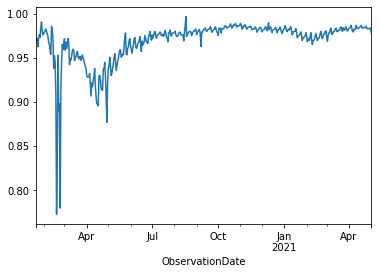

In [39]:
sr = df_cum.groupby(pd.Grouper(key = 'ObservationDate', freq= '1D'))['rate'].mean()
sr.plot()

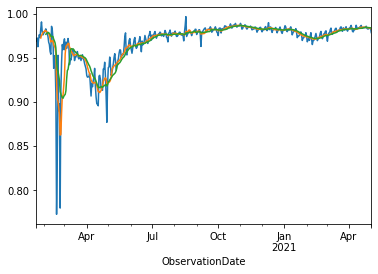

In [42]:
#diaria
sr.plot()
# 7 días (media semanal)
sr.rolling(window= 7).mean().plot()
# 14 días 
sr.rolling(window= 14).mean().plot()

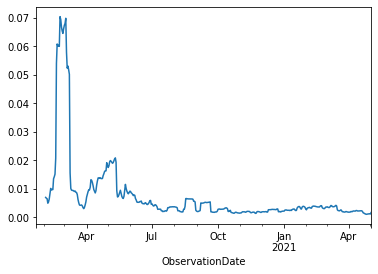

In [45]:
sr.rolling(window= 14).std().plot()

In [46]:
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
285302,2021-05-02,Ukraine,96531.0,1919.0,78700.0
285303,2021-05-02,Netherlands,26045.0,233.0,0.0
285304,2021-05-02,Mainland China,1344.0,1.0,1322.0
285305,2021-05-02,Ukraine,84641.0,1597.0,68529.0


In [47]:
# obtener los países con más casos
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending = False)

Country/Region
France             5605532.0
Turkey             4875388.0
India              4665754.0
UK                 3861901.0
US                 3744830.0
                     ...    
East Timor               1.0
Curacao                  1.0
Channel Islands          1.0
 Azerbaijan              1.0
China                    0.0
Name: Confirmed, Length: 228, dtype: float64

In [57]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key = 'ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[81549 rows x 3 columns]

In [58]:
# datos sólo de Francia
df_france = df_time.loc['France',:]
df_france

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-24,2.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,3.0,0.0,0.0
2020-01-27,3.0,0.0,0.0
2020-01-28,4.0,0.0,0.0
...,...,...,...
2021-04-28,5626985.0,104077.0,343111.0
2021-04-29,5653533.0,104385.0,344830.0
2021-04-30,5677835.0,104675.0,346480.0


In [60]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'People')

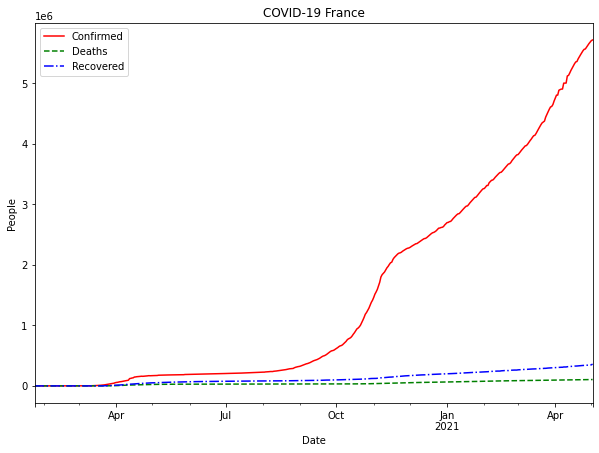

In [64]:
df_france.plot(figsize = (10, 7), title = 'COVID-19 France',
               style = ['r-','g--','b-.'])
plt.xlabel('Date')
plt.ylabel('People')

In [77]:
# pasar a datos mensuales
df_monthly = df_france.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,5.0,0.0,0.0
2020-02-29,100.0,2.0,12.0
2020-03-31,52278.0,3526.0,9513.0
2020-04-30,169098.0,24380.0,50380.0
2020-05-31,190975.0,28805.0,68473.0
2020-06-30,204244.0,29846.0,76399.0
2020-07-31,227239.0,30268.0,81764.0
2020-08-31,321160.0,30646.0,86790.0
2020-09-30,605893.0,31978.0,98632.0


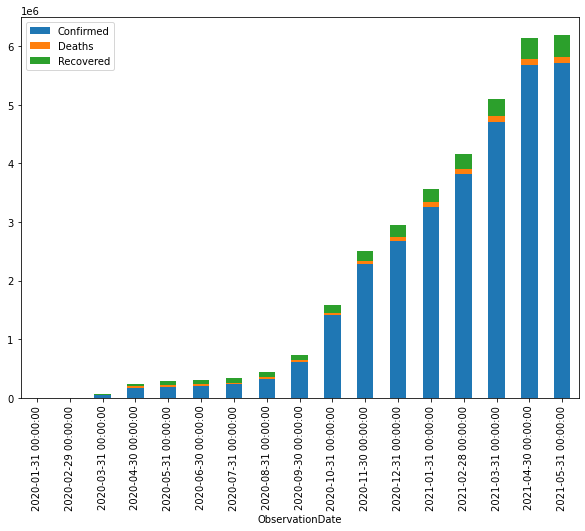

In [78]:
df_monthly.plot(kind='bar', figsize = (10, 7), stacked = True)

In [79]:
# creando la columna de personas actuales en tratamiento
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,5.0,0.0,0.0,5.0
2020-02-29,100.0,2.0,12.0,86.0
2020-03-31,52278.0,3526.0,9513.0,39239.0
2020-04-30,169098.0,24380.0,50380.0,94338.0
2020-05-31,190975.0,28805.0,68473.0,93697.0
2020-06-30,204244.0,29846.0,76399.0,97999.0
2020-07-31,227239.0,30268.0,81764.0,115207.0
2020-08-31,321160.0,30646.0,86790.0,203724.0
2020-09-30,605893.0,31978.0,98632.0,475283.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4041f30210>,
      dtype=object)

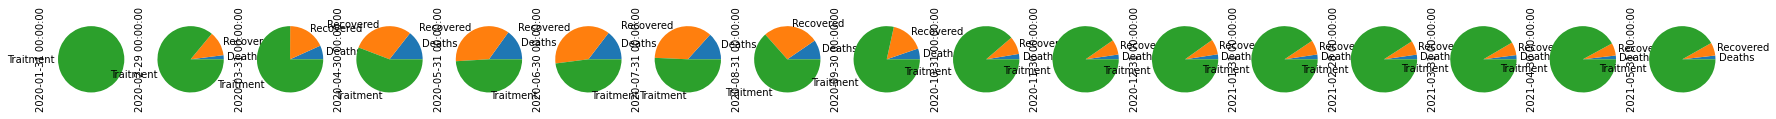

In [83]:
df_monthly[['Deaths','Recovered','Traitment']].T.plot(figsize = (30, 30), kind = 'pie', subplots = True, legend = False)

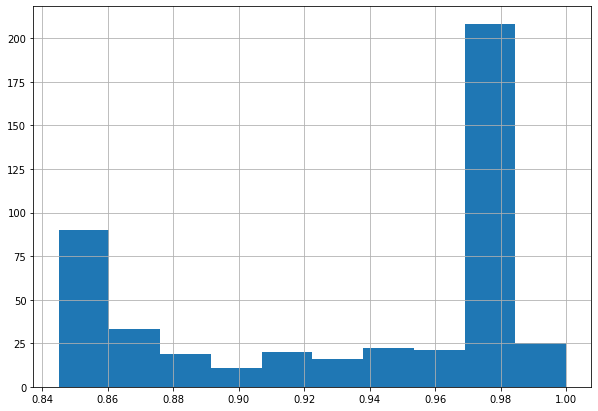

In [85]:
df_france['rate'] = 1 - df_france['Deaths']/df_france['Confirmed']
df_france['rate'].hist(figsize = (10, 7), bins = 10)

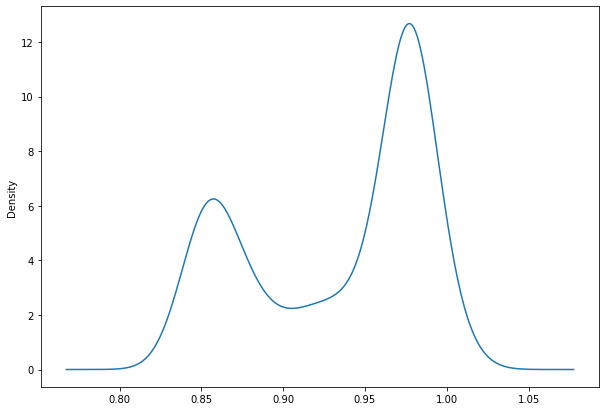

In [86]:
df_france['rate'].plot(figsize = (10, 7), kind = 'kde')